In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cmo
#import functions as fun

In [2]:
#mods = fun.models()
mods = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [6]:
mpl.rcParams['xtick.labelsize']       = 9
mpl.rcParams['ytick.labelsize']       = 9
mpl.rcParams['lines.linewidth']       = 2.
mpl.rcParams['axes.labelsize']        = 9
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 9
mpl.rcParams['font.family']           = 'serif'
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.subplot.top']    = .99
mpl.rcParams['figure.subplot.left']   = .05
mpl.rcParams['figure.subplot.right']  = .99
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 7,4.5

cols = {}
cols['ocean'] = '.7'
cols['land'] = '.9'

In [4]:
def makeglobal(ax):
    ax.set_global()
    ax.add_feature(cfeature.LAND,color=cols['land'])
    ax.add_feature(cfeature.OCEAN,color=cols['ocean'])
    ax.outline_patch.set_visible(False)

/Users/erwin/miniconda2/envs/codep/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


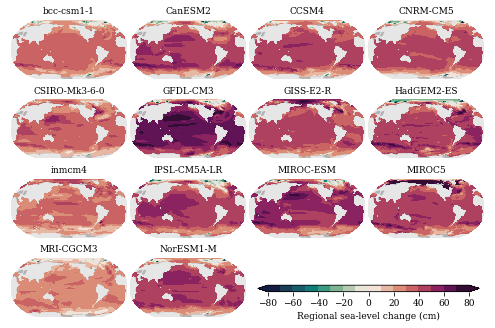

In [7]:
fig = plt.figure()

cmap1 = plt.get_cmap('cmo.curl',16)

scen = 'rcp45'
for m,model in enumerate(mods):
    with xr.open_dataset(f'../data/rsl/{model}_{scen}.nc') as ds:
        lon = ds['lon'].values
        lat = ds['lat'].values
        slr = np.nanmean(ds['SLR'][-20:,:,:].values,axis=0)
    ax = fig.add_subplot(4,4,1+m,projection=ccrs.Robinson(central_longitude=200))
    im = ax.pcolormesh(lon,lat,slr,transform=ccrs.PlateCarree(),vmin=-80,vmax=80,cmap=cmap1)
    makeglobal(ax)
    ax.set_title(model)

cax = fig.add_axes([.54,.12,.44,.02])
cb = plt.colorbar(im,cax=cax,extend='both',orientation='horizontal')
cb.set_label('Regional sea-level change (cm)')   


figname = 'posterplot_ensemble_rsl.png'

plt.savefig(f'../figures/{figname}',dpi=600)
plt.show()
plt.close()